# Decision Tree
## Table of Contents
- Introduction
- Algorithm
    - Steps for creating a decision tree
    - Information Gain (IG)
    - The Formula of Inpurity of a node
        - Entropy
        - Gini Impurity
- Illustration
- Code and Applications on data sets

### import packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

### The decision tree method used on wine dataset for clasification
First, we load the wine dataset. Then, we use first two types of wines for simplicity. 

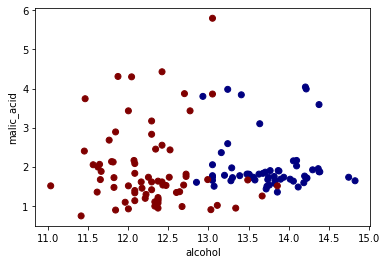

In [2]:

wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target

X = X[y!=2]
y = y[y!=2]

plt.scatter(X[:, 0], X[:,1],c=y)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.set_cmap('jet')
plt.show()

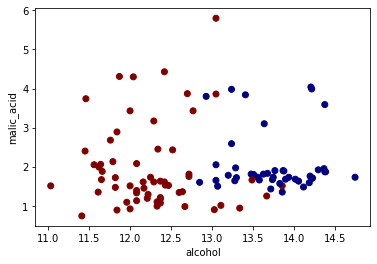

In [3]:
## Separate data into train and test.
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

In [4]:
### train the model
decision_tree=DecisionTreeClassifier(max_depth=6, random_state=0)
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=6, random_state=0)

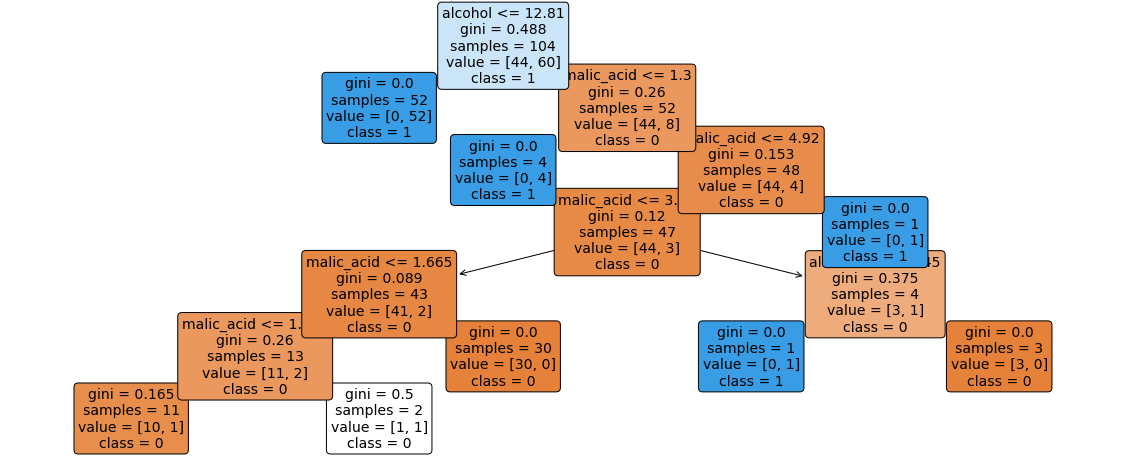

In [5]:
features = wine.feature_names[:2]
plt.figure(figsize=(20,8))
a = tree.plot_tree(decision_tree,
                  feature_names = features,
                  class_names = ["0","1"],
                  rounded = True,
                  filled = True,
                  fontsize = 14)
plt.show()

In [6]:
tree_rules = export_text(decision_tree,
                        feature_names = features)
print(tree_rules)

|--- alcohol <= 12.81
|   |--- class: 1
|--- alcohol >  12.81
|   |--- malic_acid <= 1.30
|   |   |--- class: 1
|   |--- malic_acid >  1.30
|   |   |--- malic_acid <= 4.92
|   |   |   |--- malic_acid <= 3.85
|   |   |   |   |--- malic_acid <= 1.66
|   |   |   |   |   |--- malic_acid <= 1.65
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- malic_acid >  1.65
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- malic_acid >  1.66
|   |   |   |   |   |--- class: 0
|   |   |   |--- malic_acid >  3.85
|   |   |   |   |--- alcohol <= 13.14
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- alcohol >  13.14
|   |   |   |   |   |--- class: 0
|   |   |--- malic_acid >  4.92
|   |   |   |--- class: 1



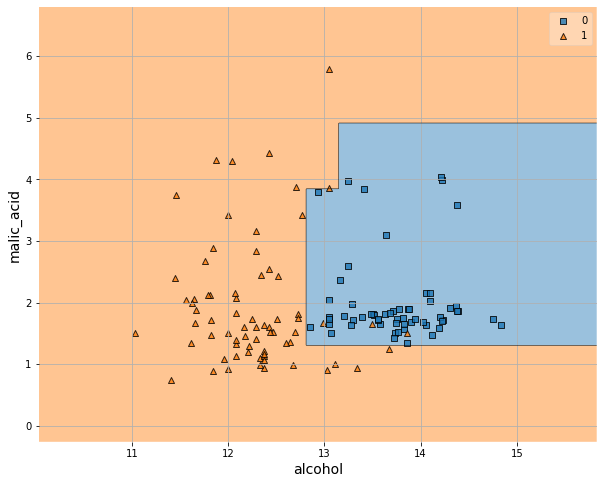

In [7]:
## plot decision region
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel(features[0], fontsize = 14)
plt.ylabel(features[1], fontsize = 14)
plt.grid()
plt.show()

### The Confusion Matrix
- True Positive (TP) = predicted true and actually true
- False Positive (FP) = predicted true but actually false
- True Negative (TN) = predicted false and actually false
- False Negative(FN) = predicted false but actually true  

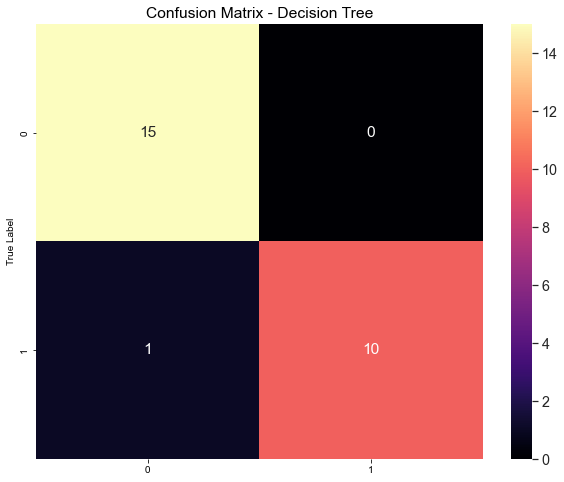

In [8]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
           annot=True,
           fmt="g",
           ax=ax,
           cmap="magma")

ax.set_title("Confusion Matrix - Decision Tree")
#ax.set_xlabel(labels)
ax.set_ylabel("True Label",fontsize=10)
#ax.set_yticklabels(labels,rotation=0)
plt.show()

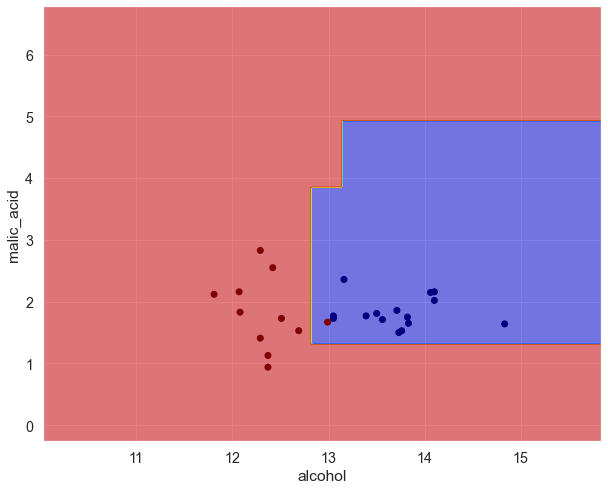

In [9]:
# Set a plot_step with the test data, which is related the confusion_matrix above
## then we can see the meaning of result from confusion_matrix above more easily
plot_step = 0.02

plt.figure(figsize=(10,8))
# Plot the decision boundary
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

xx,yy= np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))

#plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs= plt.contourf(xx,yy,Z,alpha=0.5)

plt.set_cmap("jet")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

### Accuracy Score
$$ Accuracy \ Score = \cfrac{\# \ Predicted \ Correctly}{\# \ Total} = \frac{\# \ TP+TN}{\# \ TP+TN+FP+FN} $$

In [10]:
print(f"accuracy score={metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score=0.9615384615384616


### Precision Score
Precision tell us how many of the values we predicted to be in a certain class are actually in that class
$$ Precision = \frac{\# \ TP}{\# \ TP+FP} $$

In [11]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision)
precision_results.rename(columns = {0:"precision"},inplace = True)
precision_results

precision score


,precision
0,0.9375
1,1.0000


### Recall
Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance. Proportion of actual positives was identified correctly.
$$ Recal = \cfrac{\# \ TP}{\# \ TP+FN}$$
The F1 score is the harmonic mean of the precision and recall.
$$ F1 \ Score = \cfrac{2}{recall^{-1} + precision^{-1}} = 2*\cfrac{precision*recall}{precision+recall}$$

In [12]:
# Recall and the f1-score (look them up!)

print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.91      0.95        11

    accuracy                           0.96        26
   macro avg       0.97      0.95      0.96        26
weighted avg       0.96      0.96      0.96        26



### Regression Problem
Decision Trees are also capable of performing regression tasks. The main difference is that instead of predicting a class in each node, it predicts a value. Instead of using Gini index, rgression tree will use mean square error as a metric to decide how to split the next root.

We generate sinusoidal + noise

In [25]:
rng = np.random.RandomState(0)
X = np.sort(5 * rng.rand(200,1), axis=0)
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - rng.rand(40))

Text(0.5, 1.0, 'Sinusoidal + Noise')

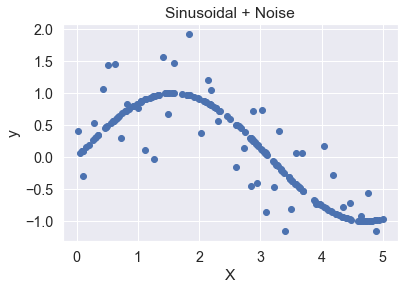

In [26]:
# Visaulize
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Sinusoidal + Noise')

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### Visualize the Tree

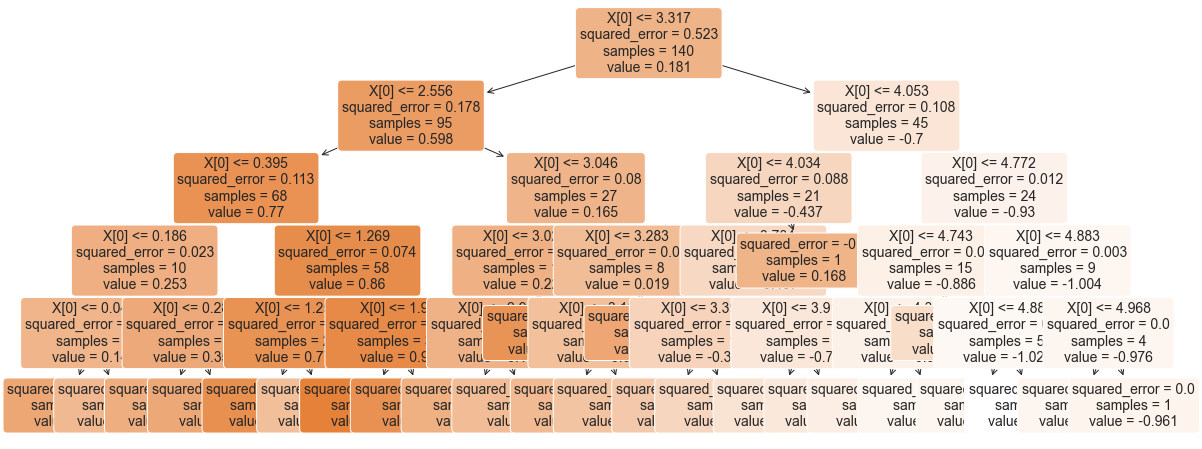

In [29]:
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(tree_reg,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()


In [30]:
pred = tree_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
print(f"mean squared error = {mean_squared_error(y_test, pred, squared=False)}")

mean squared error = 0.2598391506777825


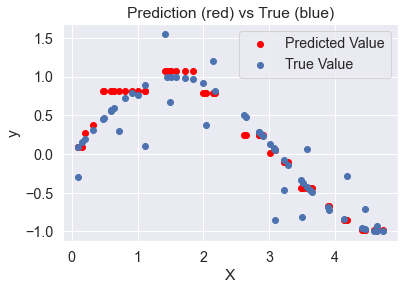

In [31]:
plt.scatter(X_test,pred,c='red',label="Predicted Value")
plt.scatter(X_test,y_test,label="True Value")
plt.xlabel("X")
plt.ylabel("y")
plt.title('Prediction (red) vs True (blue)')
plt.legend()
plt.show()

According to the above scatter plot, it looks like decision tree is overfiting the data, even learning the pattern of noise. The reason might be that we didn't prune the tree, setting the max depth.